# Life Expectancy


### Objective - More leaning on a policy side
What are we setting out to prove or predict?  That life expectancy is correlated with identifiable economic, social, national and regional attributes.  Identifying these factors will enable governments to implement policies that will aid their citizens in living longer.



In [ ]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
data = files.upload()

Saving Life_Expectancy_Data.csv to Life_Expectancy_Data.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.stats import uniform, randint, reciprocal

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
# identify our data source, which is life expectancy data collected by the World Health Organization (WHO)
source_filename = 'Life_Expectancy_Data.csv'

          
          
          
                
                ### Overview of source data
| Column                 | Desciption                   | nature
| :--------------------- | ---------------------------- | ----------------------|
Country                  | name of nation               | categorical
Year                     | calendar year                | categorical / ordinal
Status                   | development status           | categorical
Life Expectation         | avg length of life           | discrete / numeric
Adult Mortality          | deaths per 1000              | discrete / numeric
Infant Mortality         | deaths per 1000              | discrete / numeric
Alcohol                  | consumed per capita          | discrete / numeric
percentage expenditure   | Health as % of GDP           | discrete (0-100%)
Hepatitis B              | Hep B immunization %         | discrete (0-100%)
Measles                  | Cases per 1000 people        | discrete / numeric
BMI                      | average BMI of pop           | discrete / numeric
Under-five deaths        | deaths per 1000              | discrete / numeric
Polio                    | Polio immunization %         | discrete (0-100%)
Total expenditure        | Health as % of Gov           | discrete (0-100%)
Diphtheria               | DTP3 immunication %          | discrete (0-100%)
HIV/AIDS                 | deaths per 1000 in children  | discrete / numeric
GDP                      | Gross Domestic Product ($US) | discrete / numeric
Population               | Population of country        | discrete / numeric
thinness 5-9 years       | prevalencs of thinness       | discrete / numeric
Income composition       | human dev index vs resources | discrete / decimal fraction (0-1)
Schooling                | number of years of schooling | discrete / numeric (0-20) (categorical?)



In [4]:
# read the data from the source file
raw_data = pd.read_csv(source_filename)
raw_data.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [5]:
#remove any leading spaces in the column headings
raw_data.columns = raw_data.columns.str.strip()

In [6]:
# get the dimensions of our data set
raw_data.shape

(2938, 22)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# save initial count of rows
rows = raw_data.shape[0]

In [9]:
# assess the distribution of values in the data
raw_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
# # look at correlations
# matrix = raw_data.corr().round(2)
# sns.heatmap(matrix, annot=True)
# plt.show()

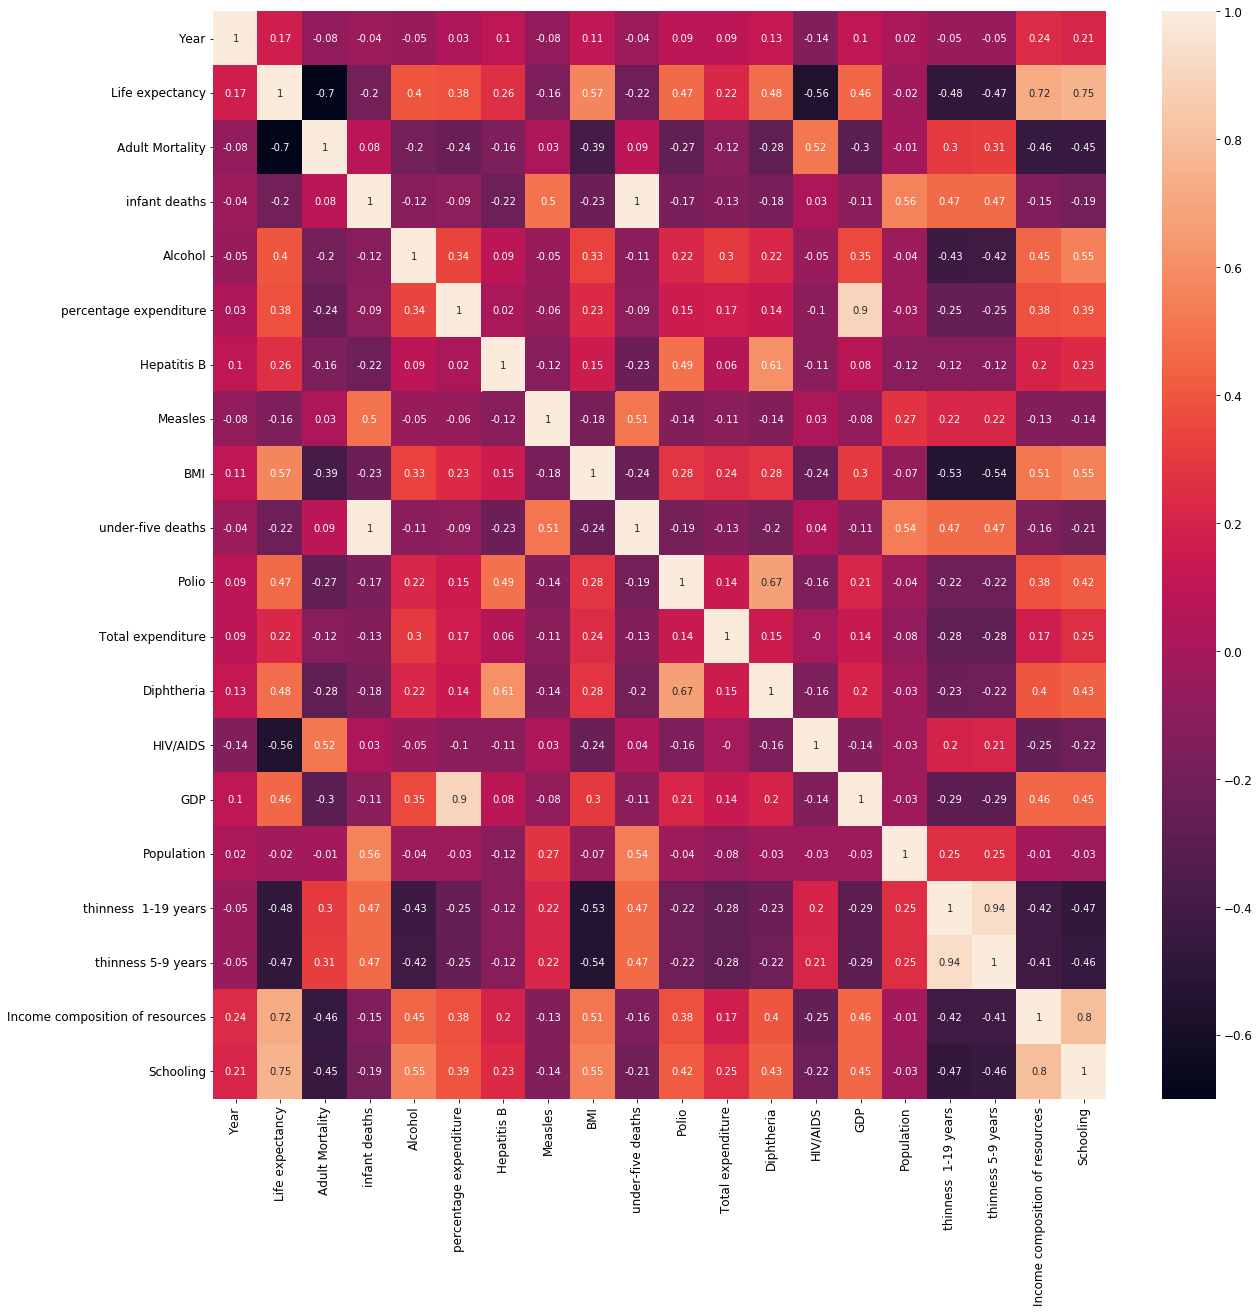

In [10]:
# look at correlations
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(raw_data.corr().round(2), annot=True, ax=ax)
plt.show()

### Observations in correlations

- Infant deaths is very highly correlated with under-five deaths
- Thinness 1-19 year is very highly correlated with thinness 5-9 years
- Percentage expenditure is very highly correlated with GDP

Drop one of each of the highly correlated features from our data


In [11]:
# Put the highly correlated features in a list, as well as the features that  are clearly not applicable to social policy, should the research question go that route.
highly_correlated = ['infant deaths','percentage expenditure', 'thinness 5-9 years' ]


#This sets up where items are going to be dropped because they would need to be encoded again for use. If going to use everything, keep the [] blank.
unrelated_to_policy =['Country', 'Year']

In [12]:
# drop the highly correlated & non-policy features
for f in highly_correlated:
    raw_data = raw_data.drop(f, axis = 1)

for f in unrelated_to_policy:
    raw_data = raw_data.drop(f, axis = 1)

In [13]:
# extract the features
features = raw_data.columns
print(features)

Index(['Status', 'Life expectancy', 'Adult Mortality', 'Alcohol',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


### Remove any rows missing life expectancy

In [14]:
# drop rows with missing life expectancy
raw_data = raw_data.dropna(subset=['Life expectancy'])
raw_data.sort_values(by=['Life expectancy']).head(10)

,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
1127,Developing,36.3,682.0,5.76,NaN,0,44.2,58,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,0.470,8.6
2312,Developing,39.0,533.0,3.97,NaN,3575,17.2,48,46.0,13.63,44.0,1.2,139.314773,4564297.0,1.3,0.292,6.7
2311,Developing,41.0,519.0,4.21,NaN,649,17.5,48,38.0,11.83,38.0,1.5,227.779471,4739147.0,1.1,0.302,7.0
2309,Developing,41.5,57.0,4.07,NaN,586,18.4,47,66.0,11.69,73.0,1.9,263.761831,5199549.0,9.7,0.322,7.4
2308,Developing,42.3,496.0,3.99,NaN,7,18.8,47,69.0,11.66,65.0,2.1,263.145817,5439695.0,9.5,0.332,7.6
1585,Developing,43.1,588.0,1.18,NaN,304,14.1,84,73.0,6.70,75.0,25.5,153.259487,11376172.0,8.0,0.391,10.7
2307,Developing,43.3,48.0,3.83,NaN,29,19.2,47,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,0.341,7.8
1584,Developing,43.5,599.0,1.15,NaN,150,14.4,80,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,0.387,10.1
2921,Developing,43.8,614.0,2.62,NaN,30930,16.8,72,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,0.418,9.6
1583,Developing,44.0,67.0,1.10,64.0,92,14.8,75,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,0.388,10.4


In [15]:
raw_data['Life integer'] = raw_data['Life expectancy'].astype(int)
print(raw_data['Life integer'])

0       65
1       59
2       59
3       59
4       59
        ..
2933    44
2934    44
2935    44
2936    45
2937    46
Name: Life integer, Length: 2928, dtype: int32


In [16]:
#This also removes outliers data from the dataset based on the boxplot created for y.
#It does not have a large impact on the final output, HOWEVER, it is required for the dataset to be stratefied.
raw_data = raw_data[~(raw_data['Life integer'] <= 43)]

In [ ]:
# labels = ["{0} - {1}".format(i, i + 5) for i in range(35, 90, 5)]
# print(labels)
# raw_data["bin"] = pd.cut(raw_data['Life integer'], range(35, 100, 5), right=False)
# print(raw_data["bin"])

### Extract Life expectancy as our target

In [17]:
# extract y, remove 'Life expectancy' from the features list
y = raw_data['Life integer']
raw_data = raw_data.drop(['Life expectancy', 'Life integer'], axis=1)
features = features.drop(['Life expectancy'])

In [ ]:
y

0       65
1       59
2       59
3       59
4       59
        ..
2933    44
2934    44
2935    44
2936    45
2937    46
Name: Life integer, Length: 2919, dtype: int64

In [18]:
#This is done to fix some of the train/test that comes later - where n_samples < 5 causes a break.
y.value_counts()

73    243
74    212
72    175
75    156
71    133
78    121
76    115
79    113
81    103
69    101
68    100
67     97
77     88
65     82
62     71
59     70
64     69
66     69
58     68
63     65
82     59
57     54
61     52
56     50
52     49
51     47
55     45
54     44
53     35
48     26
83     23
49     22
47     20
46     18
45     17
86     15
85     12
80     11
84     11
89     11
88     10
44     10
87      9
70      8
60      5
50      5
Name: Life integer, dtype: int64

In [19]:
y.describe()

count    2919.000000
mean       68.909215
std         9.443910
min        44.000000
25%        63.000000
50%        72.000000
75%        75.000000
max        89.000000
Name: Life integer, dtype: float64

(array([ 91., 123., 228., 195., 356., 306., 919., 437., 207.,  57.]),
 array([44. , 48.5, 53. , 57.5, 62. , 66.5, 71. , 75.5, 80. , 84.5, 89. ]),
 <a list of 10 Patch objects>)

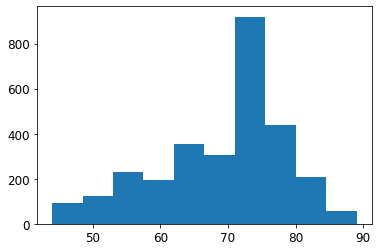

In [20]:
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x256031d8708>,
 'caps': [<matplotlib.lines.Line2D at 0x256031f1b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x256031e6f48>],
 'medians': [<matplotlib.lines.Line2D at 0x256031f78c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x256031f7f08>],
 'means': []}

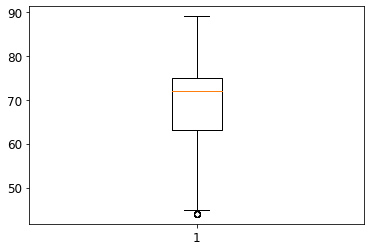

In [21]:
#Most of the items removed (where n_samples <5) are also outliers
plt.boxplot(y)

In [22]:
print(features)

Index(['Status', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


### Address missing data

In [23]:
# compile a list of the columns to clean

# first identify columns with missing values..
count_missing = raw_data.isnull().sum()

print(count_missing)

Status                               0
Adult Mortality                      0
Alcohol                            193
Hepatitis B                        544
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
Income composition of resources    160
Schooling                          160
dtype: int64


In [24]:
# then add them to a list
cols_to_clean = []
for count, value in enumerate(count_missing):
    if value > 0:
        cols_to_clean.append(features[count])

print(cols_to_clean)

['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


### Missing values clean up

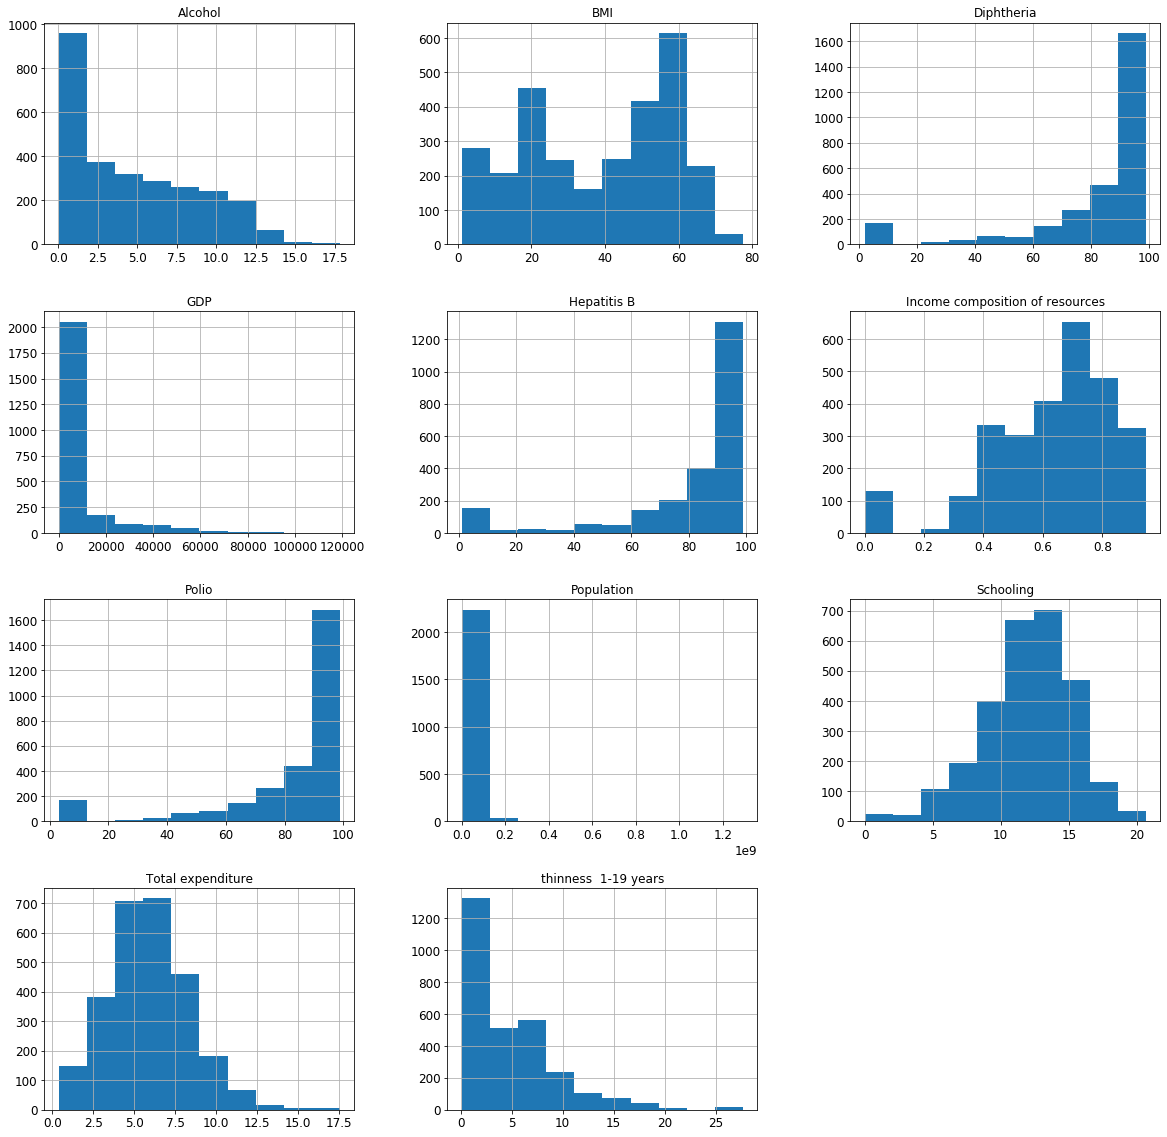

In [25]:
# visualize the distribution of the columns to clean
hplt = raw_data[cols_to_clean]
hplt.hist(figsize=(20,20));

#### use replacement with mean for  distributions that appear "normal"
- total expenditures
- schooling

#### use replacement with median for the others (especially GDP, Population & immunizations)

In [26]:
print(cols_to_clean)

['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


In [27]:
# identify the features where missing values will be set to the mean of the feature
replace_with_mean = ['Total expenditure', 'Schooling']

In [28]:
# insert the replacement values for mean
lst = [replace_with_mean]
for c in lst:
    raw_data[c] = raw_data[c].fillna(raw_data[c].mean())

# all the remaining missing values will be replaced with median
for c in cols_to_clean:
    raw_data[c] = raw_data[c].fillna(raw_data[c].mean())

### Encode categorical data

In [29]:
# there are two features which are clearly categorical -- country and the country's status as a developed or developing nation
# Country has already been removed

In [30]:
# categorical features
categorical = ['Status']

In [31]:
# create a dataframe with features to be encoded
encoded_data = pd.get_dummies(raw_data[categorical]).reset_index(drop=True)

# remove the categorical features from the dataframe
numeric_data = raw_data.drop(categorical, axis=1)

### Feature Engineering

In [32]:
# create a per-capita GDP feature -- this is preferable to gross GDP as it adjusts for population
numeric_data['Per capita GDP'] = numeric_data['GDP']/numeric_data['Population']

### Scale numeric data

In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
numeric_features = numeric_data.columns

print(numeric_features)

Index(['Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling', 'Per capita GDP'],
      dtype='object')


In [34]:
numeric_data = pd.DataFrame(std.fit_transform(numeric_data), columns = numeric_features)

## Combine & prepare train, test data


In [35]:
X = pd.concat([numeric_data, encoded_data], axis=1)

In [36]:
X.shape

(2919, 18)

In [37]:
X.describe()

,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Per capita GDP,Status_Developed,Status_Developing
count,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2919.000000,2919.000000
mean,-1.037577e-16,-2.243267e-16,-3.311652e-16,-4.994387e-17,1.765935e-16,-1.882891e-16,-1.134755e-16,3.017836e-16,1.792369e-16,8.154567e-16,-5.754599e-17,-2.101517e-17,2.639585e-17,2.993304e-17,2.333028e-16,2.370967e-17,0.175403,0.824597
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,0.380376,0.380376
min,-1.326983e+00,-1.176036e+00,-3.544016e+00,-2.108900e-01,-1.879090e+00,-2.617979e-01,-3.410385e+00,-2.336916e+00,-3.408036e+00,-3.222172e-01,-5.709433e-01,-2.369182e-01,-1.079024e+00,-3.066964e+00,-3.694591e+00,-6.725292e-02,0.000000,0.000000
25%,-7.322798e-01,-8.978986e-01,-6.298519e-16,-2.108900e-01,-9.469026e-01,-2.617979e-01,-1.970408e-01,-6.537689e-01,-1.864127e-01,-3.222172e-01,-5.266996e-01,-2.292558e-01,-7.379603e-01,-5.969347e-01,-5.264146e-01,-6.720485e-02,0.000000,1.000000
50%,-1.620168e-01,-1.145212e-01,2.676669e-01,-2.094103e-01,2.372274e-01,-2.369402e-01,4.456281e-01,-2.993613e-15,4.494339e-01,-3.222172e-01,-3.334696e-01,-1.703435e-01,-3.286833e-01,1.694576e-01,2.724718e-02,-6.711972e-02,0.000000,1.000000
75%,5.141520e-01,7.135112e-01,6.665639e-01,-1.794253e-01,8.973169e-01,-9.400839e-02,6.170064e-01,5.912125e-01,6.189931e-01,-1.834722e-01,4.143791e-16,3.450702e-17,5.126083e-01,7.064204e-01,6.424270e-01,-6.587928e-02,0.000000,1.000000
max,4.554872e+00,3.381332e+00,7.995295e-01,1.825736e+01,1.980670e+00,1.527427e+01,7.026956e-01,4.922315e+00,7.037726e-01,9.687239e+00,8.478404e+00,2.373288e+01,5.196556e+00,1.560679e+00,2.672520e+00,4.221299e+01,1.000000,1.000000


In [38]:
y.shape

(2919,)

In [39]:
# ### split into Training & test with 33% for test, 66% for training
from sklearn.model_selection import train_test_split

# #ratio of data to be used for testing vs training
# test_ratio = 1/3

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state = 0)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2335, 18) (584, 18) (2335,) (584,)


## Assess model performance


In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from time import time

In [41]:
# define a set of models to evaluate
regressor_models = [
    # linear
    {'model' : LinearRegression(), 'name' : 'Linear Reg', 'class' : 'Linear'},
    {'model' : Lasso(), 'name' : 'Lasso', 'class' : 'Linear'},
    {'model' : Ridge(), 'name' : 'Ridge', 'class' : 'Linear'},

    # bagging
    {'model' : RandomForestRegressor(), 'name' : 'Random Forest', 'class' : 'bagging'},
    {'model' : ExtraTreesRegressor(), 'name' : 'Extra Trees', 'class' : 'bagging'},
    {'model' : DecisionTreeRegressor(), 'name' : 'Decision Tree', 'class' : 'bagging'},

    # boosting
    {'model' : GradientBoostingRegressor(), 'name' : 'Gradient Boost', 'class' : 'boosting'},
    {'model' : AdaBoostRegressor(), 'name' : 'Ada Boost', 'class' : 'boosting'}
]

In [42]:
# calculate the model performance
scores = []
best_R2 = 0

for r in regressor_models:

    # fit the model
    start_time = time()
    r['model'].fit(X_train, y_train)
    training_time = time() - start_time

    # predict the outcomes
    start_time = time()
    y_pred = r['model'].predict(X_test)
    prediction_time = time()-start_time

    # calculate performance
    R_square = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    # is this the "best" fit regressor?
    if R_square > best_R2:
        best_R2 = R_square
        best_regressor = r['model']
        best_regressor_ID = r['name']
        regressor_class = r['class']

    # save the scores
    scores.append( [r['name'], r['class'], training_time, prediction_time, R_square, explained_var] )


In [43]:
# put the scores into a dataframe for convenience
scores_df = pd.DataFrame(scores, columns = ['model', 'class','train_time', 'predict_time','R2', 'Explained_Variance'])
scores_df.sort_values(by='Explained_Variance', ascending=False)

,model,class,train_time,predict_time,R2,Explained_Variance
4,Extra Trees,bagging,0.900382,0.034116,0.965119,0.965169
3,Random Forest,bagging,1.860027,0.033703,0.956542,0.956683
6,Gradient Boost,boosting,0.713675,0.000000,0.933482,0.933508
5,Decision Tree,bagging,0.032532,0.000000,0.916929,0.917060
7,Ada Boost,boosting,0.353444,0.015019,0.893009,0.895344
2,Ridge,Linear,0.004506,0.004065,0.801742,0.802209
0,Linear Reg,Linear,0.008991,0.003796,0.801728,0.802195
1,Lasso,Linear,0.006997,0.004000,0.762185,0.762471


### visualize the model scores

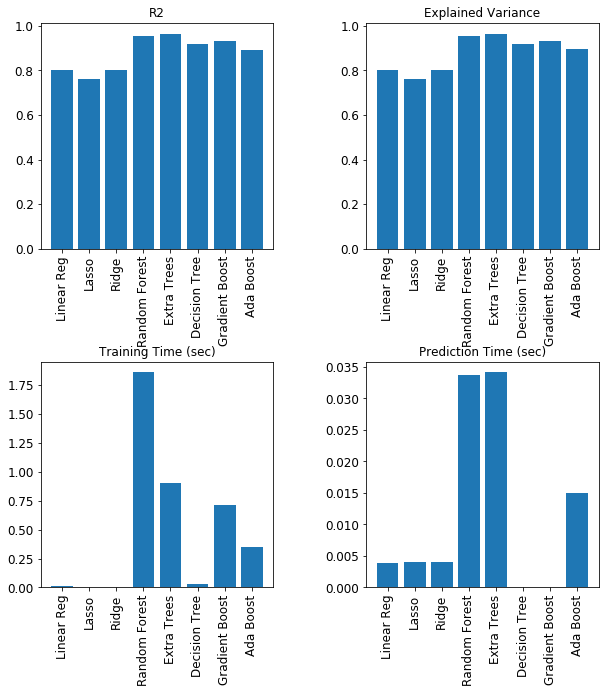

In [44]:
# initialize the plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2);
fig.set_figheight(8);
fig.set_figwidth(10);

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.5, wspace=0.4)

ax1.bar(scores_df['model'], scores_df['R2'])
ax1.title.set_text('R2')
ax1.tick_params(axis='x', rotation=90)

ax2.bar(scores_df['model'], scores_df['Explained_Variance'])
ax2.title.set_text('Explained Variance')
ax2.tick_params(axis='x', rotation=90)

ax3.bar(scores_df['model'], scores_df['train_time'])
ax3.title.set_text('Training Time (sec)')
ax3.tick_params(axis='x', rotation=90)

ax4.bar(scores_df['model'], scores_df['predict_time'])
ax4.title.set_text('Prediction Time (sec)')
ax4.tick_params(axis='x', rotation=90)

### select the best performing estimator and set parameters based on it

In [45]:
print("best regressor model is "+str(best_regressor))

best regressor model is ExtraTreesRegressor()


In [46]:
# set the parameters appropriate to the regressor

param_dist={}
if best_regressor_ID in ['Linear Reg', 'Lasso', 'Ridge']:
    param_dist = {'fit_intercept' : [True, False],
                      'normalize' : [True, False],
                      'n_jobs' : -1
                     }

elif best_regressor_ID in ['Gradient Boost', 'Ada Boost']:
    param_dist = {'n_estimators' : [1,10,50,100,200],
                 'random_state' : [0]}


elif best_regressor_ID in ['Random Forest', 'Extra Trees']:
    param_dist = {'n_estimators' : [1,10,50,100,200],
                'max_depth': [2, 3, 4, 5, None],
                'max_features': [1,2,5, None],
                 'random_state' : [0]}
    tree_model = True




### optimize the best performing regressor for best hyperparameters
* not yet clear if this is working properly, more testing needed.

In [47]:
# tune the optimal parameters using gridSearch
from sklearn.model_selection import GridSearchCV

start_time = time()
optimized = GridSearchCV(best_regressor, param_dist, cv=5)

optimized.fit(X,y)
optimize_time = time()-start_time

# predict the outcomes
y_pred = optimized.predict(X_test)

# calculate performance
R_square = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)


print("Best regressor: {}".format(optimized.best_estimator_) )
print(f"Best score is {optimized.best_score_:.3f}" )
print(f"R_square is {R_square:.3f}" )
print(f"Explained {explained_var:.3f}" )

print(f"Optimization took {optimize_time:.2f} sec" )



Best regressor: ExtraTreesRegressor(max_features=None, n_estimators=200, random_state=0)
Best score is 0.918
R_square is 1.000
Explained 1.000
Optimization took 81.42 sec


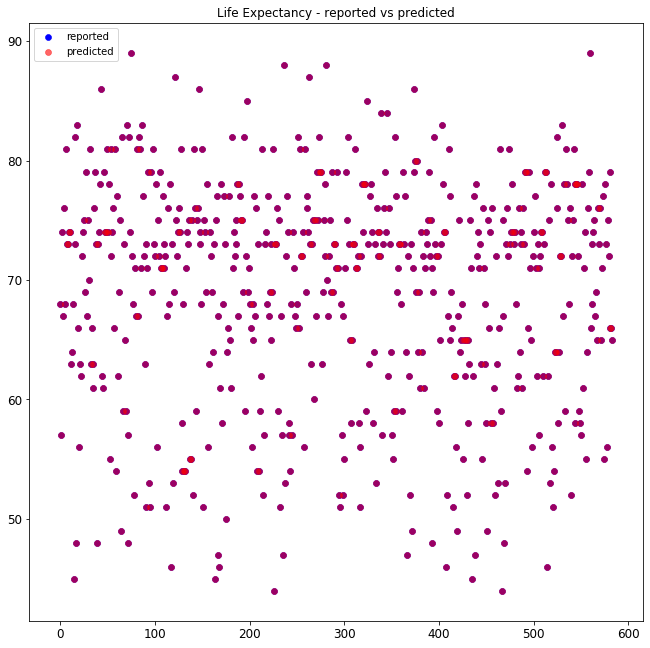

In [48]:
# visualize the performance
x_ax = range(len(y_test))
plt.figure(figsize=(11,11))
plt.scatter(x_ax, y_test, lw=0.6, color="blue", label="reported")
plt.scatter(x_ax, y_pred, lw=0.6, color="red", label="predicted", alpha=0.6)
plt.title("Life Expectancy - reported vs predicted")
plt.legend()
plt.show()


#Based on optimized extra trees - note that while the model has a very, very high accuracy, it is not 1:1, which is demonstrated by the discoloring of the points on the below predicted vs. reported scatter plot.

<Figure size 1152x576 with 0 Axes>

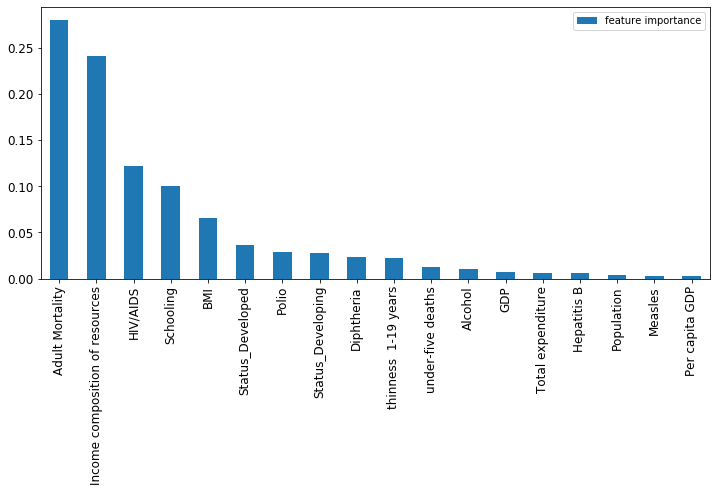

In [49]:
# visualize the features in the tree
br = best_regressor
if regressor_class in ['boosting', 'bagging']:
    best_regressor.fit(X,y)


    f = X.columns
    df_feature_importance = pd.DataFrame(br.feature_importances_, index=f, columns=['feature importance']).sort_values('feature importance', ascending=False)

    plt.figure(figsize=(16,8));
    ax = df_feature_importance.plot(kind='bar', figsize=(12,5));
    plt.show()

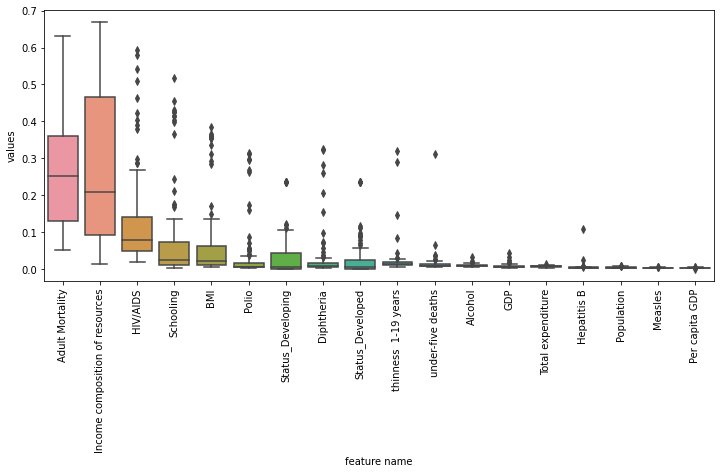

In [ ]:
# create a boxplot -- more complicated and only for tree models
# only do this if the best regressor employs a tree (random forest or extra trees)
if tree_model:
    df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in br.estimators_], columns=f)
    df_feature_long = pd.melt(df_feature_all ,var_name='feature name', value_name='values')
    plt.figure(figsize=(12,5));
    ax = sns.boxplot(x="feature name", y="values", data=df_feature_long, order=df_feature_importance.index);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    plt.show()

### KNeighborsRegressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, y_train)
neigh_predicted = neigh.predict(X_test)
r2_score(y_test, neigh_predicted)

0.9036188679338798

In [51]:
# find the best n_neighbors
no_neighbors = np.arange(1, 11)
scores = []

for i, k in enumerate(no_neighbors):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    scores.append(r2_score(y_test, knr.predict(X_test)))

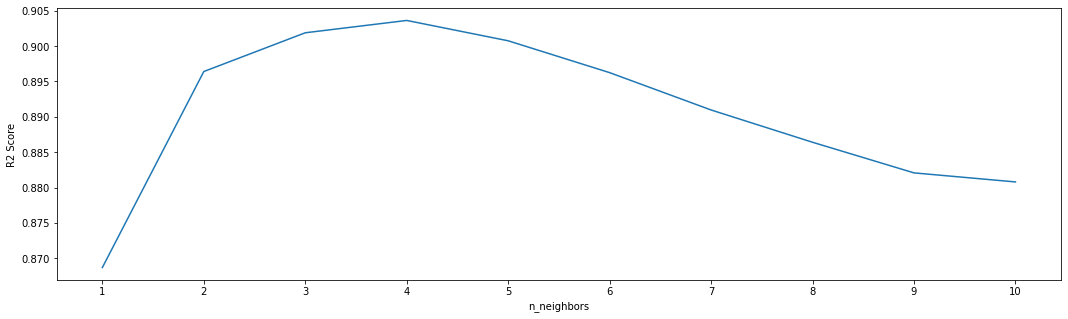

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.plot(no_neighbors, scores)
plt.xlabel('n_neighbors')
plt.ylabel('R2 Score')
plt.xticks(no_neighbors)
plt.show()

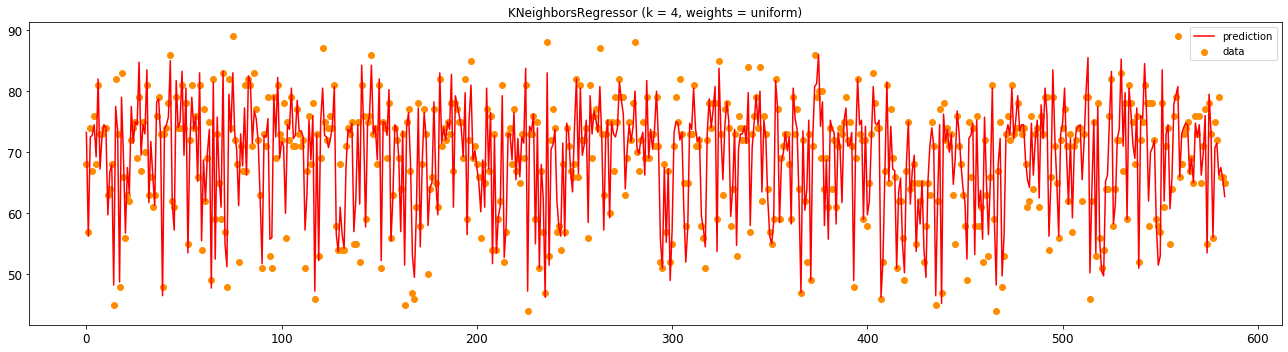

In [52]:
k0 = KNeighborsRegressor(n_neighbors=4, weights='uniform')
y_predict0 = k0.fit(X_train, y_train).predict(X_test)

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.scatter(np.arange(len(y_test)), y_test, color="darkorange", label="data")
plt.plot(np.arange(len(y_test)), y_predict0, color="red", label="prediction")

plt.axis("tight")
plt.legend()
plt.title("KNeighborsRegressor (k = 4, weights = uniform)")
plt.tight_layout()
plt.show()

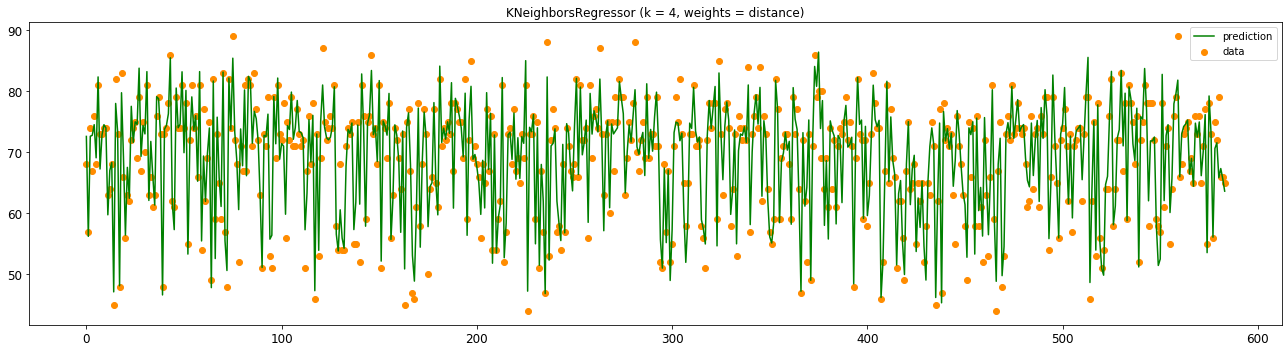

In [53]:
#Showing the impact of closest neighbours
k1 = KNeighborsRegressor(n_neighbors=4, weights='distance')
y_predict1 = k1.fit(X_train, y_train).predict(X_test)


fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.scatter(np.arange(len(y_test)), y_test, color="darkorange", label="data")
plt.plot(np.arange(len(y_test)), y_predict1, color="green", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("KNeighborsRegressor (k = 4, weights = distance)")

plt.tight_layout()
plt.show()